# Becomexpert AI Course: HW1 -- Sajad Chelabi
## Title: Student Performance

### Examine the factors influencing academic student performance using the Student Performance dataset including 10000 student records

#### Import all libraries which are needed in this project: pandas for data manipulation, matplotlib and seaborn for data visualization, and scilit learn for model creation

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

### Part 1 - Data Cleaning

#### Import Dataset: Read the dataset csv file and call the first 5 rows of the dataframe

In [94]:
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


#### Handle Duplicates and NaN Values: Find duplicated values and remove them, next reset the index column for the new set

In [95]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

#### Check dtypes and null values: Check the data types and null value counts by DataFrame.info() - So, there is not any null values and all data types are correct.

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9873 entries, 0 to 9872
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Extracurricular Activities        9873 non-null   object 
 3   Sleep Hours                       9873 non-null   int64  
 4   Sample Question Papers Practiced  9873 non-null   int64  
 5   Performance Index                 9873 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 462.9+ KB


#### Make object column numerical: The last action on data is transform 'Extracurricular Activities' column to numerical values. This goal can be reached using lambda function in just one line of code. Then check the changes by DataFrame.head()

In [97]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].apply(lambda x: 0 if x == 'No' else 1)
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


### Part 2 - Split the Data

#### Split the data to train and test: First select all features except Performance columns as input X, next define the Performance columns as output y. Divide 70 percent of  the data into the training set and 30 percent into the validation set.

In [98]:
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### Before delve into the third part, checking the feaatures correlations with the output. The previous scores and hours studied correlations are significantly higher than other parameters. 

In [99]:
df.corr()['Performance Index']

Hours Studied                       0.375332
Previous Scores                     0.915135
Extracurricular Activities          0.026075
Sleep Hours                         0.050352
Sample Question Papers Practiced    0.043436
Performance Index                   1.000000
Name: Performance Index, dtype: float64

### Part 3 - Model Selection

#### Seaborn Regression Plot: Using sns.regplot in order to gain information about how the target changes for different values of features. It is done for the most important parameters.

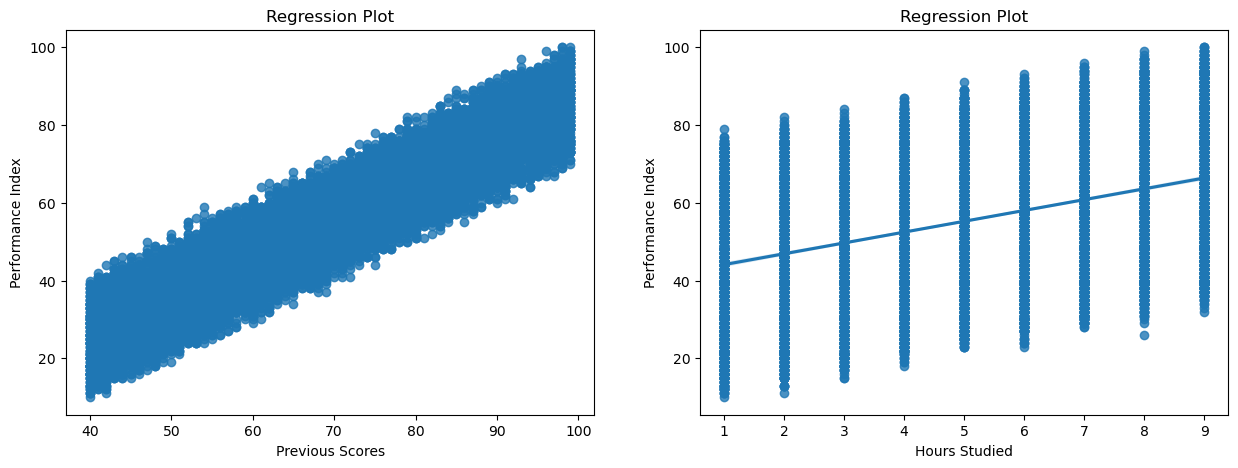

In [100]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(121, xlabel='Previous Scores', ylabel='Performance Index', title='Regression Plot')
sns.regplot(x=df['Previous Scores'], y=df['Performance Index'], data=df)

ax = fig.add_subplot(122, xlabel='Hours Studied', ylabel='Performance Index', title='Regression Plot')
sns.regplot(x=df['Hours Studied'], y=df['Performance Index'], data=df)
plt.show()

#### Select Linear Model: With attention to above results, it can be observed that the target (Performance index) values changes linearly and the linear model can fit to the data perfectly. So, create our model by Linear Regression constructor and then fit the training data to it.

In [101]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

#### Evaluate the model: Evaluate the created model's performance by R2score measure.

In [102]:
lm.score(X_test, y_test)

0.9889209283228858

#### It is Awsome! The model score is calculated almost 99 percent. Now, demonstrate prediction values along with the actual.

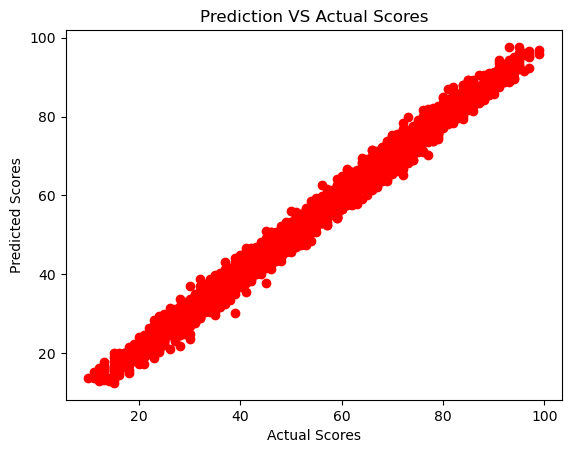

In [103]:
y_pred = lm.predict(X_test)
plt.scatter(y_test, y_pred, color='r')
plt.title("Prediction VS Actual Scores")
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.show()

#### Distribution Plot: Show the model predicted values how much covered the whole distribution of the data.

C:\Users\sajad\AppData\Local\Temp\ipykernel_12420\333107093.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axl = sns.distplot(df['Performance Index'], hist=False, color='b', label="Actual Value")
C:\Users\sajad\AppData\Local\Temp\ipykernel_12420\333107093.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bb

<Axes: xlabel='Performance Index', ylabel='Density'>

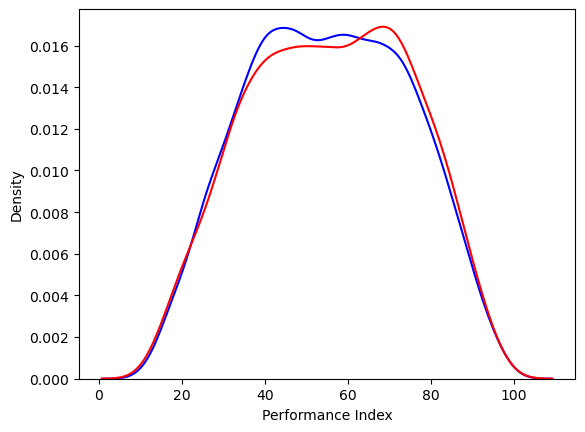

In [104]:
axl = sns.distplot(df['Performance Index'], hist=False, color='b', label="Actual Value")
sns.distplot(y_pred, hist=False, color='r', label="Fitted Values", ax=axl)

### Part 4 - Results

#### Although the linear model fitted to the data perfectly, for searching other methods and achieving any better results can use the pipeline with below parameters and check it has better prediction or not!

In [105]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2)), ('model', LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [106]:
pipe.score(X_test, y_test)

0.9889029489622138

### Finally, it concluded that the linear regression had acceptable results and aligns perfectly with the dataset.